In [ ]:
# 청주는 정말 재미없는 도시일까? (관광명소의 수로 살펴보는 재미있는 도시 분석)
# 전국의 평균과 비교했을 때 청주는 어느정도일까?
# 청주 관광명소의 특징은 무엇일까?



한글깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import pandas as pd

df = pd.read_csv('/content/(지역구 통합)국내여행 소비 역세권20210216.csv',encoding='cp949')  # 0번째 인덱스 column으로 설정
df.head()

,시도,시군구,관광명소_수,음식점_수,쇼핑점_수,인구수
0,강원도,강릉시,22.0,703.0,69.0,213189
1,강원도,강릉시,31.0,95.0,7.0,213189
2,강원도,강릉시,25.0,16.0,5.0,213189
3,강원도,강릉시,20.0,38.0,3.0,213189
4,강원도,강릉시,38.0,200.0,30.0,213189


In [ ]:
del df['인구수']
df.head()

,시도,시군구,관광명소_수,음식점_수,쇼핑점_수
0,강원도,강릉시,22.0,703.0,69.0
1,강원도,강릉시,31.0,95.0,7.0
2,강원도,강릉시,25.0,16.0,5.0
3,강원도,강릉시,20.0,38.0,3.0
4,강원도,강릉시,38.0,200.0,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      3518 non-null   object 
 1   시군구     3518 non-null   object 
 2   관광명소_수  3234 non-null   float64
 3   음식점_수   3514 non-null   float64
 4   쇼핑점_수   3500 non-null   float64
dtypes: float64(3), object(2)
memory usage: 137.5+ KB


In [ ]:
df.isna().sum()

시도          0
시군구         0
관광명소_수    284
음식점_수       4
쇼핑점_수      18
dtype: int64

In [ ]:
df[['관광명소_수','음식점_수','쇼핑점_수']] = df[['관광명소_수','음식점_수','쇼핑점_수']].fillna(0.0).astype(int)
df[['관광명소_수','음식점_수','쇼핑점_수']] = df[['관광명소_수','음식점_수','쇼핑점_수']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      3518 non-null   object
 1   시군구     3518 non-null   object
 2   관광명소_수  3518 non-null   int64 
 3   음식점_수   3518 non-null   int64 
 4   쇼핑점_수   3518 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 137.5+ KB


In [ ]:
# groupby를 이용해 같은 이름의 시군으로 합친후 sum()으로 더함.
df_sum = df.groupby('시군구')[['관광명소_수','음식점_수','쇼핑점_수']].sum()
df_sum

,관광명소_수,음식점_수,쇼핑점_수
시군구,,,
가평군,242,1881,211
강릉시,314,4975,462
강진군,182,636,133
거제시,241,5074,346
거창군,262,1162,138
...,...,...,...
홍천군,220,1670,211
화성시,174,10122,758
화순군,229,1000,149


In [ ]:
# 전국 관광명소_수의 평균 구하기
df_avg = df_sum[['관광명소_수','쇼핑점_수']].sum()/226
df_avg.astype(int)

관광명소_수    164
쇼핑점_수     330
dtype: int64

In [ ]:
# 청주의 관광명소, 쇼핑점 수
df_sum.loc['청주시'][['관광명소_수','쇼핑점_수']]


관광명소_수     465
쇼핑점_수     1351
Name: 청주시, dtype: int64

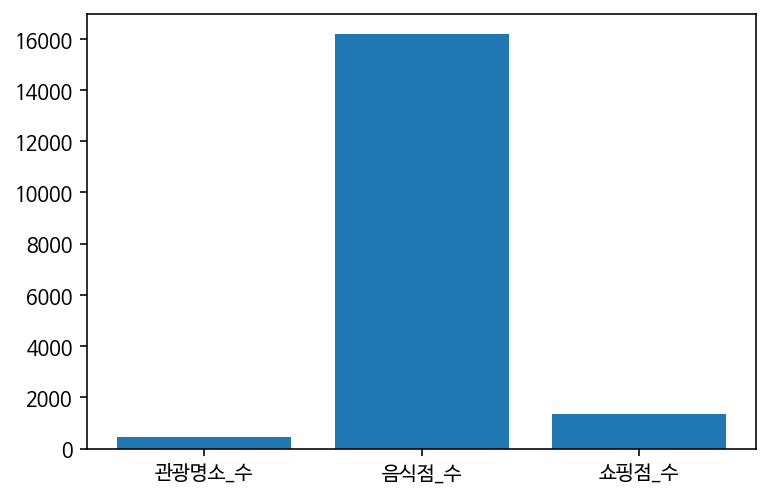

In [ ]:
label = ['관광명소_수','음식점_수','쇼핑점_수']
index = np.arange(3)
plt.bar(index,df_sum.loc['청주시'])
plt.xticks(index,label)
plt.show()

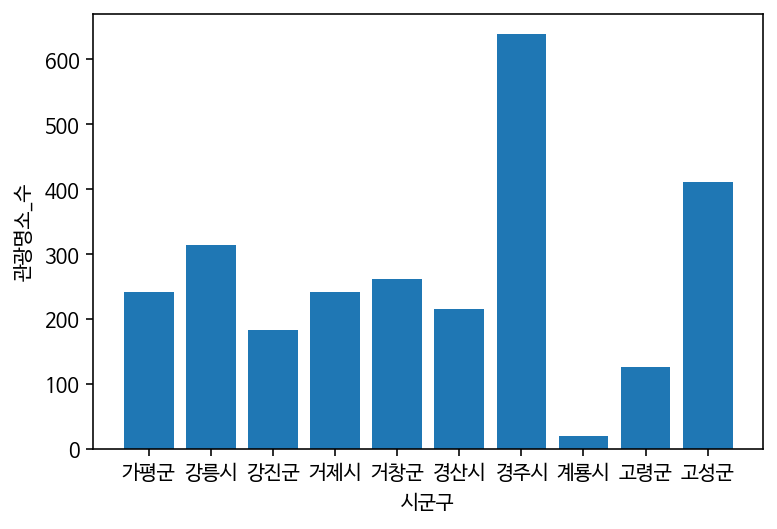

In [ ]:
label = df_sum.iloc[0:10]
index = np.arange(len(label))
plt.bar(index, df_sum.iloc[0:10]['관광명소_수'])
plt.xticks(index, df_sum.index)
plt.xlabel('시군구')
plt.ylabel('관광명소_수')
plt.show()

In [ ]:
df_asc = df_sum.sort_values(by=['관광명소_수'],ascending=False)
df_asc.iloc[:10,:]
df_asc

,관광명소_수,음식점_수,쇼핑점_수
시군구,,,
제주특별시,1111,14689,1058
경주시,638,6595,586
영천시,558,1953,239
울산 울주군,541,4658,339
창원시,516,19250,1641
...,...,...,...
오산시,29,2776,246
서울특별시 양천구,27,3935,434
인천광역시 동구,19,822,145


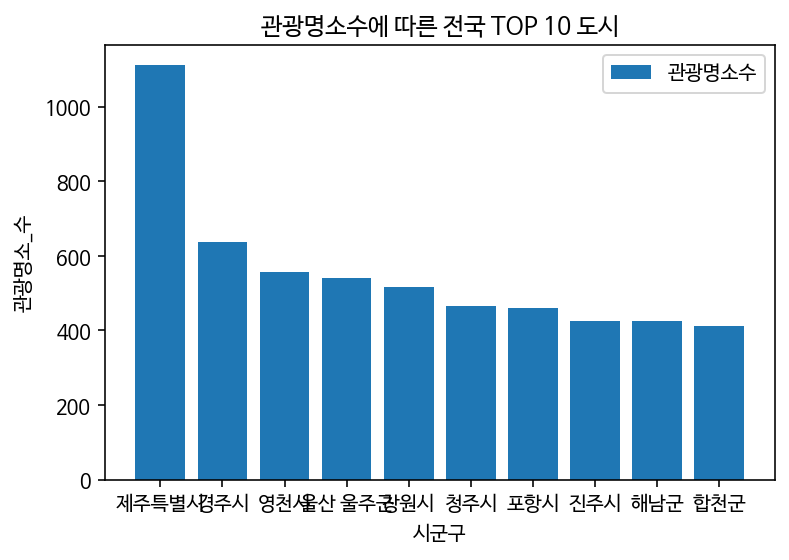

In [ ]:
label = df_asc.iloc[0:10]
index = np.arange(len(label))
plt.bar(index, df_asc.iloc[0:10]['관광명소_수'], label='관광명소수')
plt.xticks(index, df_asc.index)
plt.xlabel('시군구')
plt.ylabel('관광명소_수')
plt.title('관광명소수에 따른 전국 TOP 10 도시')
plt.legend()
plt.show()



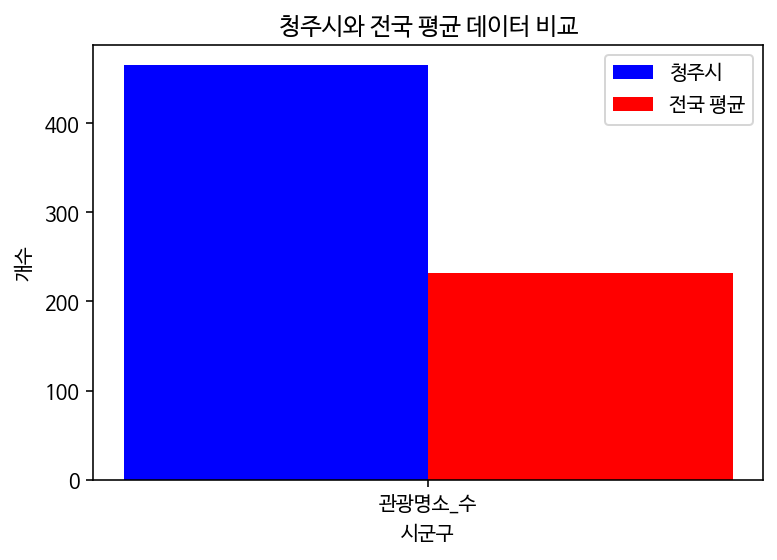

In [ ]:
# 청주와 전국 데이터 비교하기
Cnt=['관광명소_수']
cjData = [465]
totalData = [232]

index=np.arange(len(Cnt))
plt.bar(index, cjData,align='edge',width=0.4 ,color = 'b',label='청주시')
plt.bar(index + 0.4, totalData,align='edge',width=0.4, color = 'r',label='전국 평균')
plt.xticks(index+0.4,Cnt)
plt.legend()
plt.xlabel('시군구')
plt.ylabel('개수')
plt.title('청주시와 전국 평균 데이터 비교')
plt.show()

In [ ]:
df2 = df.groupby(by=['시군구']).sum().sort_values(by=['관광명소_수'],ascending=False).reset_index()
trace1 = go.Bar(x=df2['시군구'],y=df2['관광명소_수'], name = '관광명소_수')

data = [trace1]
layout = go.Layout(title = '전국 관광명소 수')
fig = go.Figure(data=data, layout=layout)
fig.show()

청주 관광명소 데이터 추출하기

In [ ]:
travel = pd.read_csv('/content/국내 지역별 관광명소 데이터.csv',encoding='cp949')
travel.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



,id,lclas,mlsfc,id_poi,poi_nm,branch_nm,sub_nm,mcate_cd,mcate_nm,pnu,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,badm_cd,hadm_cd,rd_cd,rd_nm,bld_num,x,y,grid_cd,lst_updt_dt,data_orgn,FILE_NAME,base_ymd
0,KC495PP19N000001,장소,관광지,10000098,호국전진사,NaN,NaN,180302,지역사찰,4.148040e+18,경기도,파주시,광탄면,방축리,386-54,4148035022,4148035000,4.148030e+11,혜음로,1505,126.848317,37.815154,다사426796,20201231,KT,KC_495_LLR_ATRCTN_2020,20201231
1,KC495PP19N000002,장소,관광지,10000162,상주옹기판매장,NaN,NaN,91802,토속/특산물/기념품매장,4.725050e+18,경상북도,상주시,이안면,소암리,39,4725046029,4725046000,4.725050e+11,공검이안길,963-6,128.157549,36.558256,라바588402,20201231,KT,KC_495_LLR_ATRCTN_2020,20201231
2,KC495PP19N000003,장소,관광지,10000211,추월산관광지,NaN,NaN,60513,일반관광지,4.671040e+18,전라남도,담양군,용면,월계리,산89-1,4671038026,4671038000,NaN,NaN,NaN,126.997724,35.401730,다마543118,20201231,KT,KC_495_LLR_ATRCTN_2020,20201231
3,KC495PP19N000004,장소,관광지,10000381,쇄기농장,NaN,NaN,91802,토속/특산물/기념품매장,5.013030e+18,제주특별자치도,서귀포시,남원읍,수망리,277-1,5013025324,5013025300,5.013030e+11,태수로,599-27,126.714161,33.328633,다나268821,20201231,KT,KC_495_LLR_ATRCTN_2020,20201231
4,KC495PP19N000005,장소,관광지,10206030,보타사,NaN,NaN,180302,지역사찰,4.211010e+18,강원도,춘천시,칠전동,NaN,647-1,4211012600,4211067500,4.211030e+11,옛경춘로,387-24,127.699171,37.846754,라사175830,20201231,KT,KC_495_LLR_ATRCTN_2020,20201231


In [ ]:
# 원하는 데이터만 찾기
travel_wa = travel[['mcate_nm','sgg_nm']]
travel_wa.head()

,mcate_nm,sgg_nm
0,지역사찰,파주시
1,토속/특산물/기념품매장,상주시
2,일반관광지,담양군
3,토속/특산물/기념품매장,서귀포시
4,지역사찰,춘천시


In [ ]:
travel_cj = travel_wa[travel_wa['sgg_nm']=='청주시 ']
travel_cj

,mcate_nm,sgg_nm
51,일반관광지,청주시
249,관광농원/허브마을,청주시
305,관광농원/허브마을,청주시
356,관광농원/허브마을,청주시
455,지역사찰,청주시
...,...,...
36385,먹거리/패션거리,청주시
36733,먹거리/패션거리,청주시
36855,먹거리/패션거리,청주시
36973,먹거리/패션거리,청주시


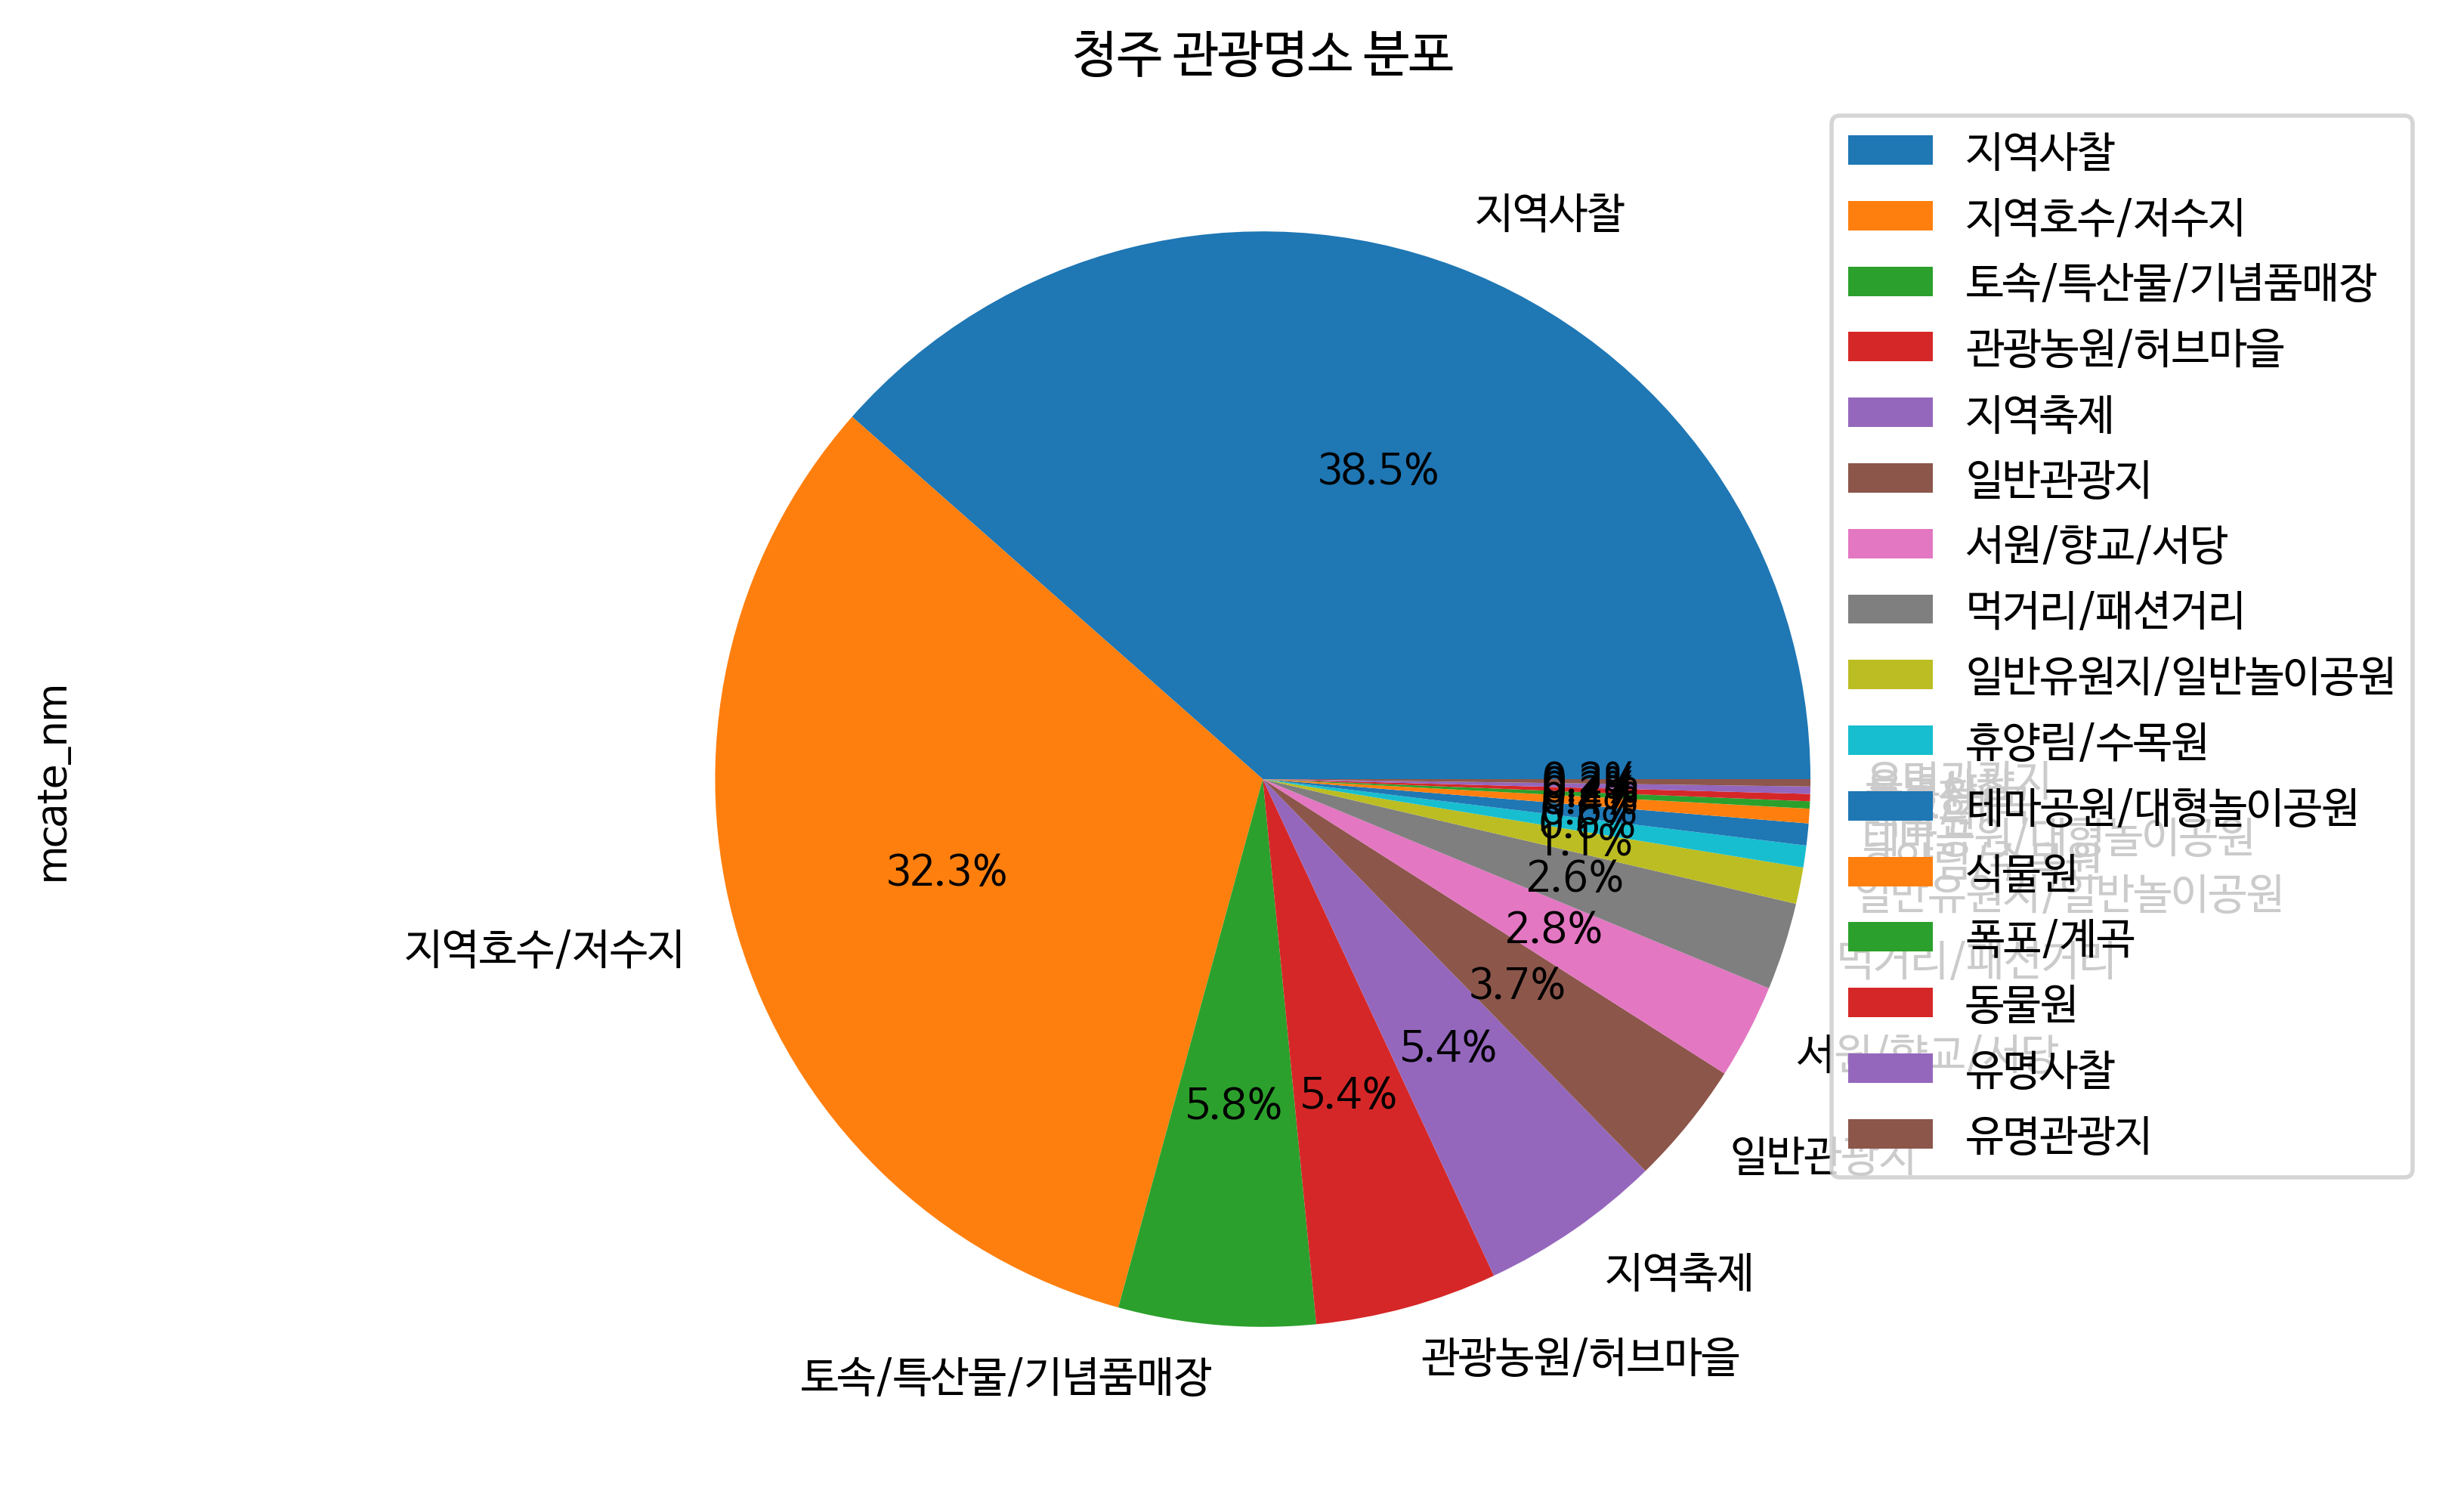

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.title('청주 관광명소 분포')
plt.axis('equal')
travel_cj.mcate_nm.value_counts().plot.pie(autopct = '%.1f%%')
plt.legend()
plt.show()
plt.savefig('청주 관광명소 분포.png')

청주 관광명소 시각화 하기

In [ ]:
df_map = travel[['poi_nm','mcate_nm','bemd_nm','y','x']]
df_map.head()

,poi_nm,mcate_nm,bemd_nm,y,x
0,호국전진사,지역사찰,광탄면,37.815154,126.848317
1,상주옹기판매장,토속/특산물/기념품매장,이안면,36.558256,128.157549
2,추월산관광지,일반관광지,용면,35.401730,126.997724
3,쇄기농장,토속/특산물/기념품매장,남원읍,33.328633,126.714161
4,보타사,지역사찰,칠전동,37.846754,127.699171


In [ ]:
# 청주시청 위도,경도 36.641775,127.4870412
import folium
# 대전 중심에 map 열기
map = folium.Map(location=[36.641775,127.4870412], zoom_start=11)

# 관광명소의 종류에 따라서 Marker를 다른 색으로 표시하기
detail_location = df_map.bemd_nm
condition = df_map.mcate_nm


for index_draw in range(1,len(condition)):
  if condition[index_draw] == '지역사찰':
    folium.Marker([df_map.loc[index_draw, 'y'],df_map.loc[index_draw, 'x']],
                  popup='지역사찰',icon=folium.Icon(color='blue', icon='info-sign')).add_to(map)
  elif condition[index_draw] == '지역호수/저수지':
    folium.Marker([df_map.loc[index_draw, 'y'],df_map.loc[index_draw, 'x']],
                  popup='지역호수',icon=folium.Icon(color='red', icon='info-sign')).add_to(map)
  else:
    folium.Marker([df_map.loc[index_draw, 'y'],df_map.loc[index_draw, 'x']],
                  popup='집',icon=folium.Icon(color='green', icon='info-sign')).add_to(map)
map